# App 3: A three-state markov switching mean-variance model: OIL-CUP

In [6]:
import Pkg
using CSV
using LinearAlgebra
using Optim
using Plots
using Dates 
using Statistics
using PrettyTables
using Distributions
using Polynomials
using UnPack
using DataFrames
using BenchmarkTools
using LaTeXStrings
using LaTeXTabulars
 
using Parameters

In [9]:
data=CSV.read("POIL_PCU_2021.csv", DataFrame, header=true, decimal=',', delim=";")
POIL = data[:, 1:2]
PCU = select(data, ["Periodo", "PCU"])[145:end,:];
include("Gen_TSMS.jl"); 
include("TSMS_functions.jl");

**OIL**

In [24]:
p_gen = @with_kw (ΣTT_prior = [1.0, 5.0, 8.0], 
                  μTT_prior = [0.0, 0.0, 0.0], 
                  ΦTT_prior = [0.0, 0.0],
                  HTT_prior = [0.0, 0.0],
                  P1_1=0.9, P1_2=0.05, P1_3=1-P1_1-P1_2, 
                  P2_1=0.05, P2_2=0.9, P2_3=1-P2_1-P2_2,    
                  P3_1=0.1, P3_2=0.1, P3_3=1-P3_1-P3_2);
Prior = p_gen()

N0 = 2_000; MM0=10_000; stand=false;

@time ΣMM_O, μMM_O, PMM_O, ΦMM_O, sigmamm_O, S1TTMM_O, S2TTMM_O, S3TTMM_O, xt_mn_O, xt_sd_O = gibs_sampling(POIL, Prior; N0=N0, MM0=MM0, stand=stand);

 64.118419 seconds (436.73 M allocations: 65.181 GiB, 17.16% gc time)


In [25]:
table_out = table_output(Prior, ΣMM_O, μMM_O, PMM_O, ΦMM_O, latex_format=false)
pretty_table(table_out, ["", "Density", "Prior", "Mean", "95%l", "95%h"];formatters = ft_printf("%5.3f"))  

┌─────┬──────────┬───────┬─────────┬─────────┬─────────┐
│     │  Density │ Prior │    Mean │    95%l │    95%h │
├─────┼──────────┼───────┼─────────┼─────────┼─────────┤
│ p11 │     Beta │ 0.900 │   0.946 │   0.923 │   0.965 │
│ p12 │     Beta │ 0.050 │   0.003 │   0.000 │   0.011 │
│ p13 │     Beta │ 0.050 │   0.051 │   0.031 │   0.074 │
│ p21 │     Beta │ 0.050 │   0.002 │   0.000 │   0.006 │
│ p22 │     Beta │ 0.900 │   0.987 │   0.976 │   0.996 │
│ p23 │     Beta │ 0.050 │   0.010 │   0.003 │   0.021 │
│ p31 │     Beta │ 0.100 │   0.293 │   0.183 │   0.416 │
│ p32 │     Beta │ 0.100 │   0.097 │   0.034 │   0.182 │
│ p33 │     Beta │ 0.800 │   0.611 │   0.477 │   0.732 │
│  ϕ1 │   Normal │ 0.000 │   0.284 │   0.083 │   0.377 │
│  ϕ2 │   Normal │ 0.000 │  -0.001 │  -0.010 │   0.018 │
│  σ1 │ InvGamma │ 1.000 │   0.105 │   0.072 │   0.111 │
│  σ2 │ InvGamma │ 5.000 │  47.743 │  42.034 │  53.843 │
│  σ3 │ InvGamma │ 8.000 │ 462.937 │ 320.518 │ 659.285 │
│  μ1 │   Normal │ 0.000 │  -0.

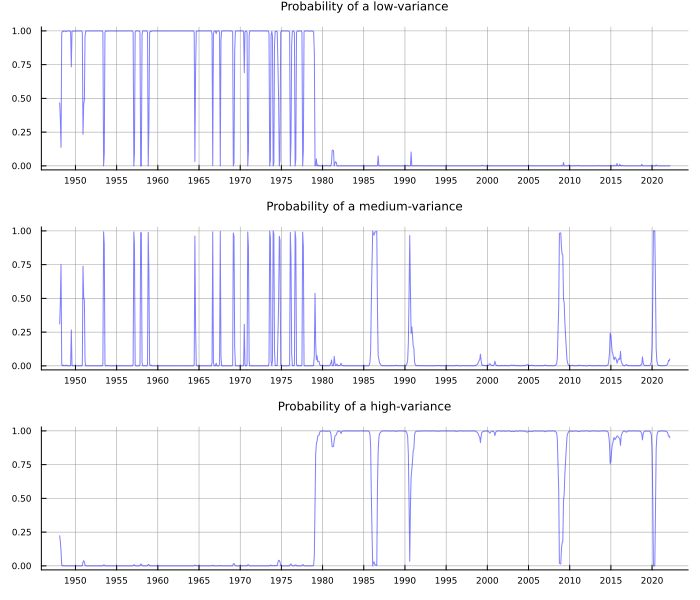

In [26]:
dates = Date(1948,2,1):Month(1):Date(2022,3,1); dates = collect(dates)
plot1, plot2 = plot_output_oil(S1TTMM_O, S3TTMM_O, S2TTMM_O, sigmamm_O, "path", dates)
plot1

**CUP**

In [23]:
p_gen = @with_kw (ΣTT_prior = [1.0, 5.0, 8.0], 
                  μTT_prior = [0.0, 0.0, 0.0], 
                  ΦTT_prior = [0.0, 0.0],
                  HTT_prior = [0.0, 0.0],
                  P1_1=0.9, P1_2=0.05, P1_3=1-P1_1-P1_2, 
                  P2_1=0.05, P2_2=0.9, P2_3=1-P2_1-P2_2,    
                  P3_1=0.1, P3_2=0.1, P3_3=1-P3_1-P3_2);
Prior = p_gen()

N0 = 2_000; MM0=10_000; stand=false
@time ΣMM_C, μMM_C, PMM_C, ΦMM_C, sigmamm_C, S1TTMM_C, S2TTMM_C, S3TTMM_C, xt_mn_C, xt_sd_C = gibs_sampling(PCU, Prior; N0=N0, MM0=MM0, stand=stand);

 55.778131 seconds (332.10 M allocations: 53.836 GiB, 18.60% gc time)


In [27]:
table_out = table_output(Prior, ΣMM_C, μMM_C, PMM_C, ΦMM_C, latex_format=false)
pretty_table(table_out, ["", "Density", "Prior", "Mean", "95%l", "95%h"];formatters = ft_printf("%5.3f"))  

┌─────┬──────────┬───────┬────────┬────────┬─────────┐
│     │  Density │ Prior │   Mean │   95%l │    95%h │
├─────┼──────────┼───────┼────────┼────────┼─────────┤
│ p11 │     Beta │ 0.900 │  0.977 │  0.958 │   0.990 │
│ p12 │     Beta │ 0.050 │  0.020 │  0.007 │   0.038 │
│ p13 │     Beta │ 0.050 │  0.003 │  0.000 │   0.009 │
│ p21 │     Beta │ 0.050 │  0.060 │  0.025 │   0.109 │
│ p22 │     Beta │ 0.900 │  0.935 │  0.884 │   0.971 │
│ p23 │     Beta │ 0.050 │  0.005 │  0.000 │   0.016 │
│ p31 │     Beta │ 0.100 │  0.035 │  0.000 │   0.119 │
│ p32 │     Beta │ 0.100 │  0.047 │  0.001 │   0.143 │
│ p33 │     Beta │ 0.800 │  0.918 │  0.795 │   0.994 │
│  ϕ1 │   Normal │ 0.000 │  0.359 │  0.295 │   0.424 │
│  ϕ2 │   Normal │ 0.000 │ -0.098 │ -0.160 │  -0.036 │
│  σ1 │ InvGamma │ 1.000 │ 18.486 │ 15.994 │  21.008 │
│  σ2 │ InvGamma │ 5.000 │ 98.964 │ 79.216 │ 122.091 │
│  σ3 │ InvGamma │ 8.000 │  2.210 │  0.025 │   0.084 │
│  μ1 │   Normal │ 0.000 │ -0.284 │ -0.566 │  -0.073 │
│  μ2 │   

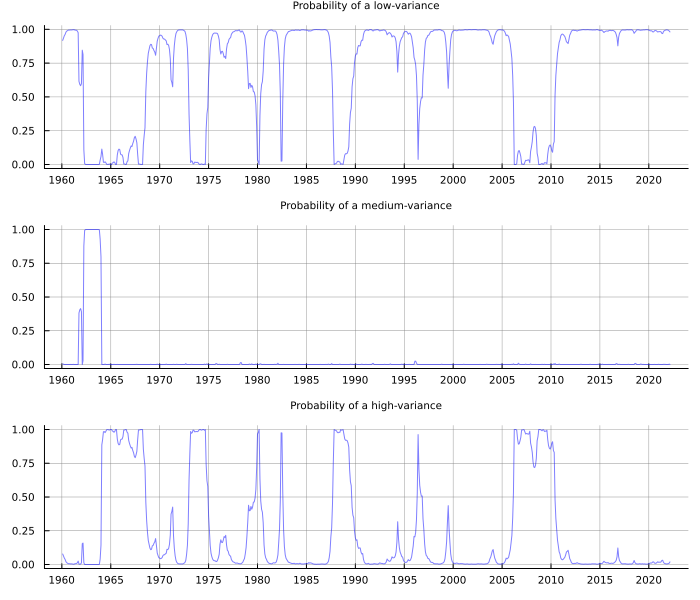

In [28]:
dates = Date(1960,2,1):Month(1):Date(2022,3,1); dates = collect(dates)
plot1, plot2 = plot_output_cu(S1TTMM_C, S3TTMM_C, S2TTMM_C, sigmamm_C, "path", dates)
plot1

## Plots

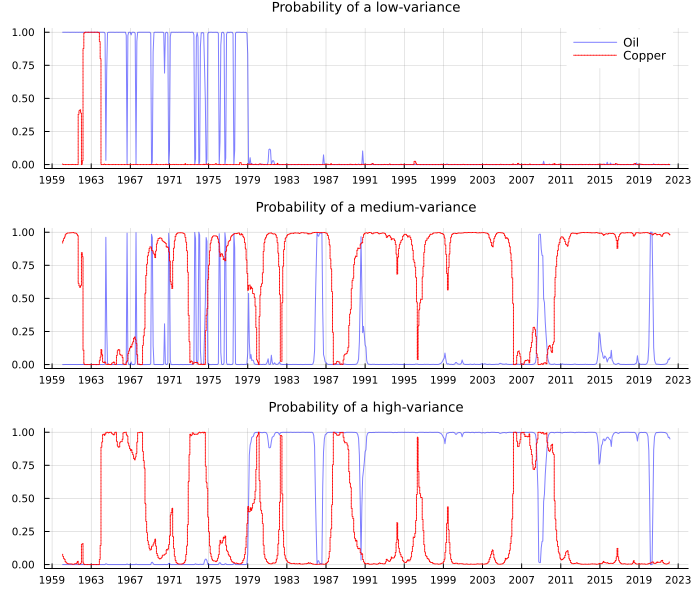

In [29]:
dates = Date(1960,2,1):Month(1):Date(2022,3,1); dates = collect(dates)
plot_output_oil_cu(S1TTMM_O, S3TTMM_O, S2TTMM_O, S3TTMM_C, S1TTMM_C, S2TTMM_C , "path", dates)

## Prices

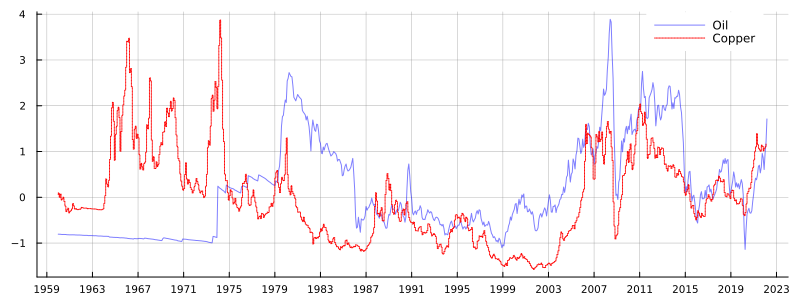

In [30]:
dates = Date(1960,1,1):Month(1):Date(2022,3,1); dates = collect(dates)
p1 = plot_prices(POIL, PCU,  "path", dates, stand=true)